<div class="alert alert-success">
<b> Комментарий от ревьюера 2 ✔️</b>

Привет еще раз. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<b>Комментарий от ревьюера</b>

Привет! Меня зовут Ярослав Кальманов, я буду делать ревью твоего проекта. Давай будем общаться на «ты».

Мои комментарии будут в ячейках "Комментарий от ревьюера".

<div class="alert alert-danger"> 

<b> Комментарий от ревьюера ❗</b>

Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">

<b> Комментарий от ревьюера ⚠️</b>

Желтым цветом отмечено то, что ты можешь сделать немного по-другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">

<b> Комментарий от ревьюера ✔️</b>

Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.  
</div>

Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___

<div class="alert alert-info">
Привет, Ярослав! я все переделала.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

👍

</div>

## Общая информация о данных

Компания «Мегалайн», федеральный оператор сотовой связи, просит провести анализ двух новых тарифных планов - «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
В начале работы стоит добавить описание проекта, чтобы твои коллеги понимали цели исследования. Это поможет и тебе самому, если ты вернешься к проекту спустя время.
    
Еще сюда можно добавить описание данных и оглавление. Описание поможет быстрее разобраться, что у нас лежит в датафрейме, а оглавление позволит понять охваченные вопросы и поможет сразу перейти к нужному разделу.
</div>

<div class="alert alert-info">
Добавила краткое описание.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Супер!

</div>


Начнем работу с общей характеристики данных, которые нам поступили. Для анализа имеются файлы расширения .csv, откроем их и рассмотрим, используя методы из библиотеки pandas.

Файл, несущий информацию о тарифах, содержит две строки, описывающие тарифные планы "Смарт" и "Ультра". 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица с данными о звонках содержит информацию о ~202 тысячах звонков. Каджому звонку присвоен id. Звонки в среднем длятся от 5 до 6 минут, максимальное время - 38 минут. Интересно отметить, что сохранены дробные значения, в то время как «Мегалайн» всегда округляет время звонка до минут вверх. В таблице указан id клиента, который совершал звонок. Есть информация о дате звонка, данные из этой колонки имеют строковый тип, для работы удобно будет перевести их в тип datatime.  

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Таблица об использовании интернет-трафика содержит информацию о количестве мегабайт, израсходованных за каждую из ~150 тысяч сессий. В среднем за сессию расходуется ~350 Мб, а иногда и до 1.5 Гб. Это адекватные значения. Каждой сессии присвоен id, указана дата и id клиента.

In [5]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Таблица о сообщениях содержит 123 тысячи строки. Каждму сообщению присвоен id, указана дата и id клиента.

In [7]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()
#messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Также в нашем распоряжении есть данные о 500 клиентах: имя, возраст, город регистрации. Каждому клиенту присвоен уникальный id, указан тарифный план, дата регистрации и дата прекращения пользования тарифом (если есть).

In [9]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


### Вывод

Для проведения анализа были получены файлы, содержащие информацию о тарифных планах, пользователях и совершаемых действиях. При поверхностном просмотре данных были сделаны следующие выводы:
- В представленных таблицах нет пропущенных значений, кроме столбца о дате снятия с регистрации, где пропущенные значения должны быть.
- Все значения соответствуют здравому смыслу, очевидных выбросов нет.
- Информация о датах во всех таблицах имеет строковый тип, при этом мы ожидаем тип datatime. 
- Имеющиеся данные могут быть использованы для решения поставленной задачи.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
С изучением загруженных данных все отлично!
</div>

## Подготовка данных

### Поиск дублирующихся строк

Дублирующихся строк в таблицах о действиях пользователей не обнаружено

In [11]:
calls.duplicated().sum()

0

In [12]:
internet.duplicated().sum()

0

In [13]:
messages.duplicated().sum()

0

### Приведение данных к соответствующему типу

Все столбцы, касающиеся даты, имеют строковый формат тип, при этом мы ожидаем тип datatime. Приведем эти данные к соответствующему типу.

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Столбец 'duration' в таблице с информацией о звонках имеет тип float, и дробные значения. При этом известно, что «Мегалайн» всегда округляет секунды до минут, то есть при расчете длительности звонка используется целое число. Округлим значения в столбце в большую сторону и переведем данные в целочисленный тип. 

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Хорошее решение
</div>

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
    Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
</div>

<div class="alert alert-info">
Перенесла строчку с библиотекой в первую ячейку.
</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Отлично!

</div>

Столбец 'user_id' в таблицах имеет целочисленный тип, хотя по сути должен быть строковым. Тип данных ни на что не влияет в этом случае, и мы не будем совершать лишних действий.

### Исправление ошибок в данных

Таблица об использовании интернета содержит столбец 'Unnamed: 0'. Похоже этот столбец дублирует индексы и мы можем от него избавиться.

In [16]:
internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Кстати, можно указать столбец Unnamed: 0 в качестве индекса таблицы при загрузке данных
    
`pd.read_csv('/datasets/internet.csv', index_col=[0])`
</div>


<div class="alert alert-info">
тогда в этом пункте будет пустовато ;))).
</div>

Проверим данные о городах проживания клиентов. Подобная информация часто имеет ошибки или скрытые повторы, так как такие данные часто заполняются вручную и имеют строковый формат.
Похоже, в наших данных нет ошибок.

In [17]:
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Предварительные рассчеты

Основная задача заключается в сравнении прибыльности двух тарифных планов. Для сравнения необходимо разделить всех клиентов (и все данные об их действиях) по тарифу, которым они пользуются. 

Oтметим, что рассчет действий и оплата производится по месяцам. Примем предположение, что клиенты пользуются услугами примерно одинаково/ровно в течение всего времени. Тогда использование трафика, звонков и сообщений за календарный месяц будет адекватно отражать использование этих услуг за рассчетный месяц. Таким образом, можно группировать все данные по календарным месяцам и использовать рассчеты для анализа.
<br>Добавим в таблицы информацию о месяцах.

In [18]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month

Заметим, что все пользователи в наших данных были зарегистрированы в 2018 году. Дата прекращения пользования тарифом также указана за 2018 год. Это означает, что данные о пользовании мобильной связью для разных клиентов есть за разный период. Клиенты не пользовались изучаемыми тарифами часть 2018 года, и для каждого клиента эта часть разная. 

In [19]:
users['reg_date'].dt.year.unique()

array([2018])

In [20]:
users['churn_date'].dt.year.unique()

array([  nan, 2018.])

Найдем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя. Данные о минутах разделим на две части по тарифному плану.

<div class="alert alert-danger">
    
<b> Комментарий от ревьюера ❗</b>
    
Давай переделаем с нуля все, что идет дальше.
    
1. Сейчас мы работаем с данными в формате сводных таблиц, это не очень удобно. Давай попробуем сгруппировать данные так, чтобы получить плоскую таблицу вроде такой
    
    | user_id | month | tariff | duration | messages | internet | payment |
    |---------|-------|--------|----------|----------|----------|---------|
    | 1000    | 10    | smart  | 400      | 10       | 2        | 550     |

1. Для анализа данных и проверки гипотез не нужно группировать данные по user_id. Я понимаю, что при текущей структуре данных такое решение выглядит наиболее удобным, но мы сильно уменьшаем выборку и меняем распределение признака, потому что некоторые клиенты пользовались нашими услугами 2 месяца, а некоторые - 12 месяцев.
    
Обнови данные, и я смогу продолжить проверку работы
    
</div>

<div class="alert alert-info">
Переделала.
</div>

Сведем данные в таблицу, где посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;

In [21]:
#интернет и длительность звонков
data = pd.merge(
    internet.groupby(['user_id', 'month'])['mb_used'].sum(), 
    calls.groupby(['user_id', 'month'])['duration'].sum(), 
    how = 'outer',
    on=['user_id', 'month']
)

In [22]:
#плюс количество звонков
data = data.merge(
    calls.groupby(['user_id', 'month'])['duration'].count(), 
    how = 'outer', 
    on=['user_id', 'month']
)

In [23]:
# и добавим сообщения
data = data.merge(
    messages.groupby(['user_id', 'month'])['message_date'].count(),
    how = 'outer',
    on=['user_id', 'month']
)

Посмотрим на таблицу, которая у нас получилась. Мы видим пропуски в столбцах о минутах, сообщениях и гигабайтах. В эти месяцы пользователи не совершали соответствующих действий. Заполним их нулями.

In [24]:
data.head()

mb_used  duration_x  duration_y  message_date
user_id month                                                
1000    5       2253.49       159.0        22.0          22.0
        6      23233.77       172.0        43.0          60.0
        7      14003.64       340.0        47.0          75.0
        8      14055.93       408.0        52.0          81.0
        9      14568.91       466.0        58.0          57.0

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 4 columns):
mb_used         3203 non-null float64
duration_x      3174 non-null float64
duration_y      3174 non-null float64
message_date    2717 non-null float64
dtypes: float64(4)
memory usage: 113.9 KB


In [26]:
#Похоже мы потеряли пару месяцев данных, но это меньше 0.1%, не будем из-за них перерисовывать таблицу
#Кстати, буду рада подсказке как можно это исправить. Я поковырялась с генераторами словарей, но решила что игра не стоит свеч
sum(users['churn_month'].fillna(12)-users['reg_month']+1)

3216.0

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

> Похоже мы потеряли пару месяцев данных,
    
Если объединим данные с таблицей users, появятся два клиента, которые не пользовались услугами связи 
    
    users_new = users.reset_index(drop=True)
    data.merge(users_new[['user_id','city','tariff']], on ='user_id', how='outer')

</div>

In [27]:
data = data.fillna(0)

Вспомним, что помесячная оплата за интернет снимается за потраченные гигабайты с округлением вверх. Пересчитаем данные в соответствующем столбце. Приведем в порядок назввния колонок.

In [28]:
data['mb_used'] = np.ceil(data['mb_used']/1024)

In [29]:
data.columns = ['gb', 'minutes', 'calls_count', 'messages']

### Рассчет помесячной выручки с каждого пользователя

Для подсчета прибыли нужно ввевсти в данные тарифный план для каждого пользователя.

In [30]:
users.index = users['user_id']
data = data.reset_index(level='month')
data['tariff'] = users['tariff']

Напишем функцию для подсчета прибыли и применим её к таблице. Результат сохраним в отдельной колонке.

In [31]:
def payment(row):
    tariff = row['tariff']
    res=0
    if tariff == 'smart':
        res = np.clip(((row['gb']-15)*200), 0, None)
        res += np.clip(((row['minutes']-500)*3), 0, None)
        res += np.clip(((row['messages']-50)*3), 0, None)
        res += 550
        return res
    elif tariff == 'ultra':
        res = np.clip(((row['gb']-30)*150), 0, None)
        res += np.clip((row['minutes']-3000), 0, None)
        res += np.clip((row['messages']-1000), 0, None)
        res += 1950
        return res

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2 ⚠️</b>
    
Лучше брать лимиты из таблицы tariffs, иначе оператор может изменить условия тарифов, и нам придется править функцию
</div>

In [32]:
data['payment'] = data.apply(payment, axis=1)

Проверим, что при рассчетах получены адекватные цифры. Полученные значения выглядят правдоподобно. Столбец с информацией о платежах заполнен полностью, клиенты платили за каждый месяц пользования связью.

In [33]:
data['payment'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: payment, dtype: float64

Посмотрим на итоговую таблицу. Все колонки имеют адекватные значения и названия.

In [34]:
data.head()

,month,gb,minutes,calls_count,messages,tariff,payment
user_id,,,,,,,
1000,5,3.0,159.0,22.0,22.0,ultra,1950.0
1000,6,23.0,172.0,43.0,60.0,ultra,1950.0
1000,7,14.0,340.0,47.0,75.0,ultra,1950.0
1000,8,14.0,408.0,52.0,81.0,ultra,1950.0
1000,9,15.0,466.0,58.0,57.0,ultra,1950.0


<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

С группировкой данных и расчетом месячных платежей все отлично!

</div>

### Вывод

Для анализа были получены данные, нуждающиеся в минимальной обработке:
- Нет некорректных или пропущенных значений, нет дублирующихся строк.
- Один столбец (похоже, артефакт предыдущей обработки) явно не нес дополнительной информации. Мы удалили этот столбец, хотя он никак не мешал нашей работе.
- Данные, касающиеся дат, были приведены к типу datatime.
- Данные, касающиеся времени разговора, были округлены до минут и приведены к целочисленному формату.

В ходе подготовки данных были проведены следующие рассчеты:
- Клиенты "Мегалайн" разделены на две группы в зависимости от выбранного тарифного плана.
- Для каждого пользователя данные о количестве минут разговора, смс-сообщениях и пользовании интернет-трафиком в течение календарного месяца были сведены в соответствующие таблицы.
- Была рассчитана помесячная прибыль от каждого типа действий для каждого пользователя.
- Была рассчитана общая прибыль от каждого клиента.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Посмотрим, как разговаривают по телефону пользователи тарифов "смарт" и "ультра".

Изучим статистические характеристики (среднее значение, стандартное отклонение, дисперсию, квартили) данных об использованных минутах разговора для двух тарифов. 
<br>Похоже, пользователи тарифа "ультра" любят разговаривать немного больше, чем клиенты тарифа "смарт". Средние, квартильные и максимальные значения данных по тарифу "ультра" больше, чем по тарифу "смарт". Среднее арифметическое по месячной сумме минут разговора  составляет 527 минут, на 109 минут (~25%) больше, чем для тарифа "смарт", это значительная разница. 
<br>Стандартное отклонение также больше для данных по тарифу "ультра", это означает,что поведение клиентов данного тарифа более разнообразное.
<br>Отметим, что медиана суммарной длительности звонков для пользователей "смарт" не превышает бесплатный лимит в 500 минут. Также можно отметить, что 3000 минут разговора, включенные в тариф "ультра" остаются непотраченными. Никто из представленных клиентов не говорит по телефону так много.

In [35]:
print('Тариф "смарт"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='smart']['minutes']))
data.loc[data['tariff']=='smart']['minutes'].describe()

Тариф "смарт"
Дисперсия 36203.06665209469


count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: minutes, dtype: float64

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Кстати, если нас просили посчитать только среднее, дисперсию и стандартное отклонение, можно использовать метод agg, чтобы агрегировать данные
    
`data.groupby('tariff')['minutes'].agg(['mean','var','std'])`

</div>

In [36]:
print('Тариф "ультра"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='ultra']['minutes']))
data.loc[data['tariff']=='ultra']['minutes'].describe()

Тариф "ультра"
Дисперсия 100771.2236172022


count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: minutes, dtype: float64

Построим гистограммы для среднего месячного расходования минут разговора для двух тарифов. 

Из гистограммы по данным тарифа "смарт" видно, что значения собраны около отметки в 400-500 минут. Гистограмма по данным тарифа "ультра" гораздо шире, чем для тарифа "смарт" (и ниже, но это связано с меньшим числом пользователей). Это соотносится с разницей в стандартном отклонении - чем больше отклонение, тем шире пик. 
<br>В целом форма гистограмм позволяет предположить, что пользователи тарифа "смарт" стараются уложиться в бесплатные 500 минут разговора. При этом оставлять предоплаченные минуты невостребованными пользователи этого тарифа также не хотят. Практически никто из представленных 350 меловек не говорит по телефону менее 200 минут в месяц.
<br>Пользователи тарифа "ультра", напротив, используют мобильную связь как им удобно. Есть клиенты, которые вообще не разговаривают по телефону, или же тратят до 200 минут. Доля таких клиентов в тарифе "ультра" значительно выше, чем для тарифа "смарт". Также заметное количество клиентов использует по 800 и более минут разговора.

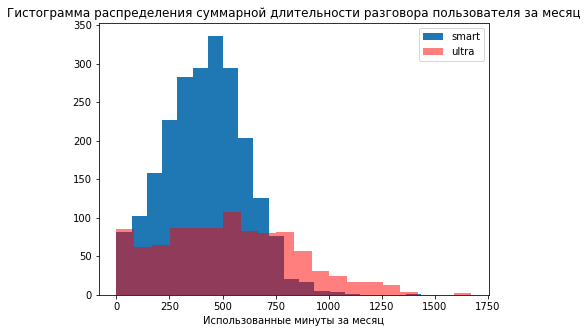

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[data['tariff']=='smart']['minutes'], bins=20, label='smart')
ax.hist(data.loc[data['tariff']=='ultra']['minutes'], bins=20, label='ultra', color='red', alpha=0.5)
ax.set_xlabel('Использованные минуты за месяц')  
ax.set_title('Гистограмма распределения суммарной длительности разговора пользователя за месяц')
ax.legend()
#data.loc[data['tariff']=='smart']['minutes'].hist()

Проведем ту же работу с данными о количестве смс-сообщений для каждого пользователя. Опять же отметим разницу в средних и медианных значениях и в дисперсии для тарифов. Все эти показатели больше для тарифа "ультра". То есть клиенты тарифа "ультра" в общем чаще отправляют сообщения, при этом их поведение более вариативное.

In [38]:
print('Тариф "смарт"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='smart']['messages']))
data.loc[data['tariff']=='smart']['messages'].describe()

Тариф "смарт"
Дисперсия 796.455482917076


count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [39]:
print('Тариф "ультра"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='ultra']['messages']))
data.loc[data['tariff']=='ultra']['messages'].describe()

Тариф "ультра"
Дисперсия 2282.9460753948824


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

На обеих гистограммах выделяется пик около нулевого значения. То есть большое количество клиентов не пользуются услугой отправки смс-сообщений, или пользуются очень редко. И доля таких клиентов не зависит от тарифного плана.
На гистограмме для данных по тарифу "смарт" заметна явная зависимость между количеством сообщений и количеством пользователей. Много пользователей отправляют по 25-30 сообщений за месяц, далее, чем больше сообщений, тем меньшее количество клиентов имеют такие показатели. Большинство пользователей тарифа "смарт" за месяц отправляют не более 60 сообщений (при бесплатном лимите 50), при среднем значении в 32 сообщения, стандартное отклонение составляет 26 сообщений.
<br>На гистограмме по данным тарифа "ультра" такая зависимост не прослеживается. Пользователи ровно распределены по ежемесячному количеству отправленных сообщений в количестве от 10 до 100. количество клиентов снижается для значений от 100 до 200 смс в месяц. Никто из клиентов в наших данных не отправляет 200 или более сообщений в месяц. Соответственно, в наших данных нет клиента, который превысил бы лимит в 1000 бесплатных сообщений. Эти соображения подтверждаются средним значением в 53 смс в месяц и большим значением дисперсии, 46 для тарифа "ультра" против 26 для тарифа "смарт".

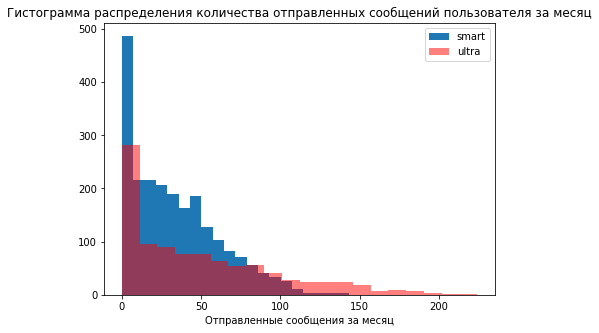

In [40]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[data['tariff']=='smart']['messages'], bins=20, label='smart')
ax.hist(data.loc[data['tariff']=='ultra']['messages'], bins=20, label='ultra', color='red', alpha=0.5)
ax.set_xlabel('Отправленные сообщения за месяц')  
ax.set_title('Гистограмма распределения количества отправленных сообщений пользователя за месяц')
ax.legend()

Изучим, как используют мобильный интернет клиенты "Мегалайн" с разными тарифными планами. Для данных по использованию интернета мы видим схожую с телефонными разговорами и смс-сообщениями картину. Дисперсия среди данных по тарифу "ультра" выше, чем для тарифа "смарт". Также среднее и медианное значение для тарифа "ультра" выше. Клиенты тарифа "ультра" пользуются мобильным трафиком активнее, при этом разброс в значениях между пользователяти тарифа "ультра" выше, чем между пользователями "смарт".

In [41]:
print('Тариф "смарт"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='smart']['gb']))
data.loc[data['tariff']=='smart']['gb'].describe()

Тариф "смарт"
Дисперсия 33.013887454837445


count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb, dtype: float64

In [42]:
print('Тариф "ультра"\n'
      'Дисперсия',  np.var(data.loc[data['tariff']=='ultra']['gb']))
data.loc[data['tariff']=='ultra']['gb'].describe()

Тариф "ультра"
Дисперсия 96.99311602978689


count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb, dtype: float64

Гистограммы распределения использования интернет-трафика похожи на гистограммы для использования минут разговора. Мы видим кучное распределение около значения бесплатного лимита для тарифа "смарт" (синий) и широкий разброс значений для тарифа "ультра".
Среднее арифметическое ежемесячного использования интернет-трафика для пользователей тарифа "смарт" составило 16 Гб, что на 1 Гб выше, чем бесплатный лимит. Для пользователей тарифа "ультра" среднее арифметическое составило почти 20 Гб, то есть примерно половина от максимального значения в почти 40 Гб. Только небольшой процент клиентов превышает бесплатный лимит в 30 Гб.
Стандартные отклонения значений использования интернет-траффика для тарифов "смарт" и "ультра" различаются в более чем в два раза. Это значит, что в случае тарифа "смарт" значения больше тяготеют к некой точке (конечно, значение бесплатного лимита), чем в случае тарифа "ультра".

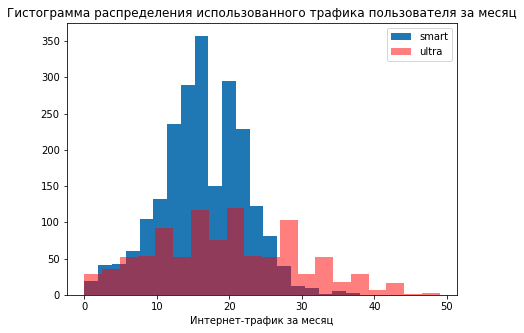

In [43]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[data['tariff']=='smart']['gb'], bins=20, label='smart')
ax.hist(data.loc[data['tariff']=='ultra']['gb'], bins=20, label='ultra', color='red', alpha=0.5)
ax.set_xlabel('Интернет-трафик за месяц')  
ax.set_title('Гистограмма распределения использованного трафика пользователя за месяц')
ax.legend()

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера ⚠️</b>
    
Добавь, пожалуйста, на все графики названия, подписи осей и легенду ((если рассматриваешь несколько наборов данных). Можешь посмотреть [тут](https://matplotlib.org/stable/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface), как их добавлять
</div>


<div class="alert alert-info">
Нарисовала графики посредством matplotlib.
</div>

### Вывод

При описании поведения клиентов двух тарифов оператора можно заметить следующие закономерности:
- Гистограммы распределения для данных по тарифу "смарт" узкие, большинство данных собраны около значения бесплатного лимита. Гистограммы для тарифа "ультра" широкие, много маленьких и больших значений. Предположить значение бесплатного лимита по гистограммам нельзя.
- Средние значения по количеству отправленных смс-сообщений, минутам разговора и интернет-трафику для тарифа "смарт" меньше, чем для тарифа "ультра".
- Стандартные отклонения всех изученных распределений для тарифа "смарт" примерно в два раза меньше, чем для тарифа "ультра". 

Среди частных замечаний можно выделить следующие:
- Большое количество клиентов не пользуется услугой отправки смс-сообщений, или пользуется таковой очень редко.
- Пользователи тарифа "смарт" часто превышают бесплатный лимит по всем трем типам услуг, хотя явно стараются ограничиться именно бесплатным лимитом.
- Клиенты тарифа "ультра" практически никогда не превышают лимит по количеству смс и минут разговора, но иногда превышают бесплатный лимит использования интернет-трафика.

В целом можно предположить, что пользователи тарифа "смарт" стараются ограничивать потребление услуг бесплатным лимитом, а польззователи тарифа "ультра" используют связь по потребности. Похоже, что распределения по трем типам услуг для тарифа "ультра" - это реальные потребности клиентов телеком-компании.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Ты отлично справилась с анализом данных

</div>

## Сравнение средней выручки пользователей тарифов «Ультра» и «Смарт» 

Сформулируем гипотезы, чтобы ответить на вопрос, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт». Нулевая гипотеза: средние двух совокупностей данных о средней ежемесячной выручке по клиентам тарифов "смарт" и "ультра" равны между собой. Альтернативная гипотеза: средние двух совокупностей данных о средней ежемесячной выручке по клиентам тарифов "смарт" и "ультра" **не** равны между собой.

Для интереса отметим, что пользователи тарифа "смарт" из наших данных за год принесли "Мегалайну" почти 2.9 млн рублей, а пользователи тарифа "ультра" - 2.0 млн рублей.

In [44]:
print('Общий доход от тарифа "смарт"', data.loc[data['tariff']=='smart']['payment'].sum())
print('Общий доход от тарифа "ультра"', data.loc[data['tariff']=='ultra']['payment'].sum())

Общий доход от тарифа "смарт" 2875351.0
Общий доход от тарифа "ультра" 2039100.0


Рассмотрим распределение среднемесячной прибыли от пользователей двух тарифных планов на гистограмме. Отметим, что большинство пользователей тарифа "смарт" приносит "Мегалайну" от 550 (абонентская плата) до 1000 рублей в месяц, далее, при увеличении прибыли количество клиентов снижается. И лишь небольшой процент клиентов приносит 1950 рублей (абонентская плата тарифа "ультра") или более.

Практически все пользователи тарифа "ультра" ограничиваются бесплатным лимитом по услугам, ведь в тариф включено действительно большое количество минут, сообщений и гигабайт. То есть почти все пользователи этого тарифа приносят 1950 рублей в месяц. Небольшое количество клиентов превышают лимит, но в итоге очень редко приносят более 3000 за месяц.  

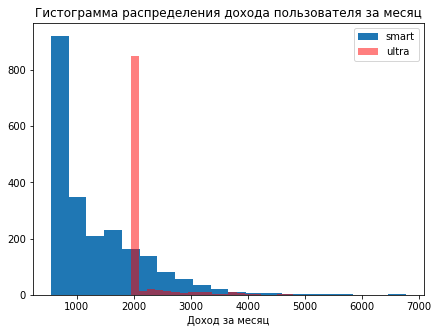

In [45]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[data['tariff']=='smart']['payment'], bins=20, label='smart')
ax.hist(data.loc[data['tariff']=='ultra']['payment'], bins=20, label='ultra', color='red', alpha=0.5)
ax.set_xlabel('Доход за месяц')  
ax.set_title('Гистограмма распределения дохода пользователя за месяц')
ax.legend()

Если мы рассмотрим средние значения помесячной прибыли от клиентов с разными тарифами, то обнаружим значительный разрыв между суммами. Средний пользователь тарифа "смарт" приносит 1289 рубля, а средний пользователь тарифа "ультра" - 2070 рублей. Отметим большую разницу, примерно в 4 раза, между дисперсиями для распределений. Обратимся к статистическим методам чтобы понять, насколько велика эта разница.

In [46]:
print('Среднее значение помесячной прибыли от пользователей тарифа "смарт"', data.loc[data['tariff']=='smart']['payment'].mean())
print('Стандартное отклонение', np.var(data.loc[data['tariff']=='smart']['payment']))
print()
print('Среднее значение помесячной прибыли от пользователей тарифа "ультра"',data.loc[data['tariff']=='ultra']['payment'].mean())
print('Стандартное отклонение', np.var(data.loc[data['tariff']=='ultra']['payment']))

Среднее значение помесячной прибыли от пользователей тарифа "смарт" 1289.9735307312696
Стандартное отклонение 669485.2209234245

Среднее значение помесячной прибыли от пользователей тарифа "ультра" 2070.1522842639592
Стандартное отклонение 141373.07325620347


Применим статистические методы для оценки равенства средних совокупностей средней месячной прибыли от клиентов с разными тарифными планами. Воспользуемся t-тестом для проверки двух генеральных совокупностей. Не будем забывать, что дисерсии этих совокупностей различны. Получим значения статистики разности и p-value. Согласно полученным значениям, вероятность равенства этих совокупностей составляет около 4e-250, то есть ничтожно мала.

Таким образом, нулевую гипотезу о равенстве совокупностей можно отвергнуть. Значит, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2 ⚠️</b>
    
> Согласно полученным значениям, вероятность равенства этих совокупностей составляет около 4e-250, то есть ничтожно мала.
    
Не совсем так. Это вероятность получить такие или еще большие различия между средними значениями при верной нулевой гипотезе.
    
</div>


In [47]:
from scipy import stats as st

st.ttest_ind(
    data.loc[data['tariff']=='smart']['payment'], 
    data.loc[data['tariff']=='ultra']['payment'],
    equal_var = False
)

Ttest_indResult(statistic=-37.019021231454644, pvalue=4.2606313931076085e-250)

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера 2 ⚠️</b>
    
Все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
    Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
</div>


### Вывод

- Показано, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
- Помесячный доход от среднего пользователя тарифа "ультра" составляет 2070 рублей, а от среднего пользователя тарифа "смарт" - значительно меньше, всего 1289 рубля.
- Суммарный доход от всех пользователей тарифа "смарт" составил почти 2.9 млн рублей, в то время как пользователи тарифа "ультра" принесли заметно меньше, 2.0 млн рублей.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Ты правильно сформулировала гипотезы и выбрала подходящий способ проверки

</div>

## Сравнение выручки пользователей из Москвы и из других регионов.

Проанализируем различия меду пользователями из Москвы и из регионов. Сформулируем гипотезы, чтобы ответить на вопрос, различается ли средняя выручка этих групп пользователей. Нулевая гипотеза: средние двух совокупностей данных о средней ежемесячной выручке по клиентам из Москвы и из регионов равны между собой. Альтернативная гипотеза: средние двух совокупностей данных о средней ежемесячной выручке по клиентам из Москвы и из регионов **не** равны между собой.

Выделим группу клиентов из Москвы.

In [48]:
users_moscow = users.query('city=="Москва"')['user_id'].reset_index(drop=True)

Посмотрим соотношение пользователей тарифов "смарт" и "ультра" среди москвичей и жителей других регионов. Полученные значения в 2.1 и 2.4 различаются не сильно. Можно считать, что поведение москвичей и жителей регионов при выборе тарифа не различается.

In [49]:
print('Соотношение количества пользователей тарифа "смарт" к тарифу "ультра" в Москве')
print(users.query('city=="Москва" and tariff=="smart"').shape[0] / users.query('city=="Москва" and tariff=="ultra"').shape[0])

print('Соотношение количества пользователей тарифа "смарт" к тарифу "ультра" в регионах')
print(users.query('city!="Москва" and tariff=="smart"').shape[0] / users.query('city!="Москва" and tariff=="ultra"').shape[0])

Соотношение количества пользователей тарифа "смарт" к тарифу "ультра" в Москве
2.09375
Соотношение количества пользователей тарифа "смарт" к тарифу "ультра" в регионах
2.427350427350427


Исходя из вышесказанного, а также из доказанной разницы в доходах от тарифов "смарт" и "ультра", будет корректным сравнивать прибыль от Москвы и регионов внутри отдельных тарифов.

Исследуем данные о доходах по пользователям тарифа "смарт" из Москвы и регионов.

Построим гистограммы для групп клиентов из Москвы и регионов. Заметим, что основные закономерности уменьшения количества пользователей с ростом прибыли сохраняется как для группы московских пользователей, так и для клиентов из регионов. 

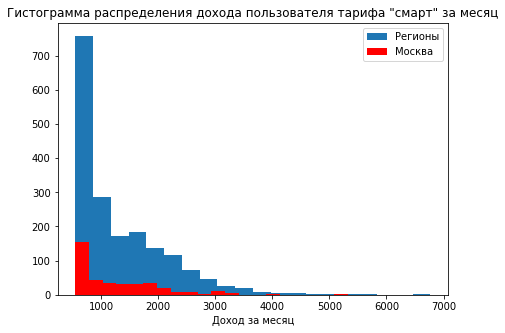

In [50]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[(~data.index.isin(users_moscow)) & (data['tariff'] =='smart')]['payment'], bins=20, label='Регионы')
ax.hist(data.loc[(data.index.isin(users_moscow)) & (data['tariff'] =='smart')]['payment'], bins=20, label='Москва', color='red')
ax.set_xlabel('Доход за месяц')  
ax.set_title('Гистограмма распределения дохода пользователя тарифа "смарт" за месяц')
ax.legend()

Воспользуемся статистическими методами для оценки равенства выручки для пользователей из Москвы и регионов. Применим t-тест для этих данных. Значение p-value составляет 0.18, то есть вероятность равенства таких совокупностей или более далеких составляет 18%. Это значение превышает общепринятые пороговые значения в 5% и 1%. 

In [51]:
st.ttest_ind(
    data.loc[(~data.index.isin(users_moscow)) & (data['tariff'] =='smart')]['payment'], 
    data.loc[(data.index.isin(users_moscow)) & (data['tariff'] =='smart')]['payment'],
)

Ttest_indResult(statistic=1.3365422154311812, pvalue=0.18150864159228705)

Таким образом, совокупности данных о выручке по Москве и в регионах для тарифа "смарт" равны.

Выделим группу москвичей и жителей регионов среди пользователей тарифа "ультра". 

Гистограмма по данных о доходах от пользоватерей тарифа "ультра" отличалась наличием большого столбца около значения 1950 рублей, то есть абонентской платы по тарифу. Такие же гистограммы мы видим для москвичей и жителей регионов, нельзя выделить какие-то особенности для этих групп.

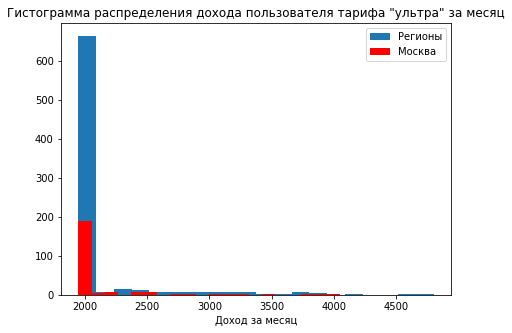

In [52]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(data.loc[(~data.index.isin(users_moscow)) & (data['tariff'] =='ultra')]['payment'], bins=20, label='Регионы')
ax.hist(data.loc[(data.index.isin(users_moscow)) & (data['tariff'] =='ultra')]['payment'], bins=20, label='Москва', color='red')
ax.set_xlabel('Доход за месяц')  
ax.set_title('Гистограмма распределения дохода пользователя тарифа "ультра" за месяц')
ax.legend()

Метод t-теста для совокупностей данных для жителей Москвы и регионов среди пользователей тарифа "ультра" показал значение p-value равное 0.86. Для принятия решения об признании нулевой гипотезы ошибочной значениеp-value не должно превышать значения в 0.05.

Таким образом, совокупности данных о выручке по Москве и в регионах для тарифа "ультра" равны.

In [53]:
st.ttest_ind(
    data.loc[(~data.index.isin(users_moscow)) & (data['tariff'] =='ultra')]['payment'], 
    data.loc[(data.index.isin(users_moscow)) & (data['tariff'] =='ultra')]['payment'],
)

Ttest_indResult(statistic=-0.17457722431416178, pvalue=0.8614477943640767)

### Вывод

Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов в рамках отдельных тарифов.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Все верно

</div>

## Общий вывод

Основной целью данного проекта было определение перспективного тарифа для телеком-компании. В рамках решения этой проблемы была поставлена задача сравнить поведение пользователей тарифов "смарт" и "ультра" и их выручку по выборке клиентов. 
- Были получены и изучены файлы с информацией о тарифах, о пользователях и их действиях. Определено, что полученные файлы подходят для анализа выручки и активности клиентов.
- Полученные файлы были предобработаны - проверены на наличие повторов, ошибок и выбросов. Данные о дате были приведены к подходящему типу. Информация о времени разговора была приведена к целочисленному типу с округлением вверх, как того требует тарификация «Мегалайна».
- Были проведены предварительные рассчеты. Данные о звонках, сообщениях и сессиях использования интернета для каждого пользователя были просуммированы по календарным месяцам и сведены в соответствующие таблицы. Предобработанные данные разделены по тарифному плану.
- Для каждого типа активности пользователей была посчитана помесячная выручка, также была рассчитана выручка от каждого клиента за каждый календарный месяц пользования тарифом.
- Было проанализировано поведение пользователей, определены особенности использования разных услуг связи. Найдены различия в использовании минут разговора, сообщений и интернет-трафика между пользователями тарифов "смарт" и "ультра".
- Были сопоставлены показатели средней месячной выручки от пользователей разных тарифов. Позазано, что средняя выручка пользователей тарифов «ультра» и «смарт» различаются. 
- При сравнении выручки клиентов из Москвы и регонов было обнаружено, что средняя выручка пользователей из Москвы **не** отличается от выручки пользователей из других регионов.

Еще раз отметитм, что выручка среднего пользователя тарифа "ультра" выше выручки среднего пользователя тарифа "смарт". Однако, согласно данным из нашей выборки, суммарно за 2018 год пользователи тарифа "смарт" принесли на треть больше выручки, чем  пользователя тарифа "ультра" из-за значительной разницы в количестве пользователей тарифов.

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Хороший вывод

</div>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера ✔️</b>
    
Спасибо за твою работу! 
    
Измени, пожалуйста, группировку данных, и я смогу проверить проект. Жду твои исправления :)
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2 ✔️</b>

Ты хорошо справилась с подготовкой и анализом данных, у тебя получились понятные графики и логичные выводы.
    
Надеюсь, эта работа была полезна для тебя. Я принимаю проект и желаю удачи в прохождении курса!

</div>